In [12]:
import numpy as np 
import gymnasium as gym 
import matplotlib.pyplot as plt
from collections import defaultdict

In [13]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
gamma = 0.9  
episodes = 1000000
returns_sum = defaultdict(float)  
returns_count = defaultdict(int)
V = defaultdict(float)

#Monte-Carlo Prediction
for episode in range(episodes):
    initial_state = env.reset()
    state = initial_state if isinstance(initial_state, int) else initial_state[0]
    episode_data = []
    done = False

    while not done:
        action = env.action_space.sample()  # Random policy
        next_state, reward, done, _ , _ = env.step(action)
        
        state = int(state) if not isinstance(state, int) else state
        next_state = int(next_state) if not isinstance(next_state, int) else next_state

        episode_data.append((state, reward))
        state = next_state

    G = 0
    iter = 0

    for state, reward in reversed(episode_data):
        state = int(state)  
        G += gamma**iter * reward
        iter += 1
        returns_sum[state] += G
        returns_count[state] += 1
        V[state] = returns_sum[state] / returns_count[state]

for state in range(env.observation_space.n):
    print(f"State {state}: Value = {V[state]:.6f}")

State 0: Value = 0.013849
State 1: Value = 0.011476
State 2: Value = 0.020378
State 3: Value = 0.009521
State 4: Value = 0.015990
State 5: Value = 0.000000
State 6: Value = 0.039524
State 7: Value = 0.000000
State 8: Value = 0.034673
State 9: Value = 0.087534
State 10: Value = 0.138466
State 11: Value = 0.000000
State 12: Value = 0.000000
State 13: Value = 0.176063
State 14: Value = 0.437400
State 15: Value = 0.000000


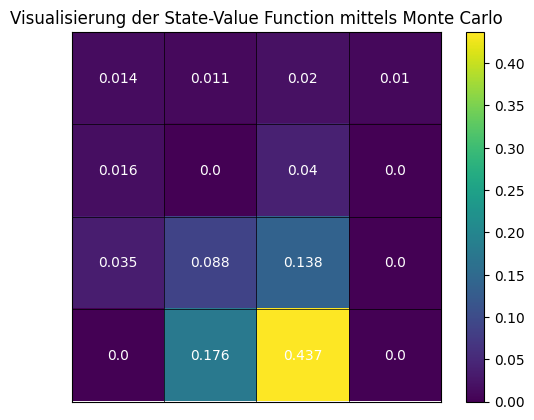

In [14]:
def visualize_state_value_function(state_values): 
    matrix = np.round(state_values, 3)
    fig, ax = plt.subplots()
    cax = ax.imshow(matrix, cmap='viridis', origin='upper')

    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(j, i, matrix[i, j], ha='center', va='center', color='white')

    plt.colorbar(cax)
    plt.grid(visible=True, color='black', linestyle='-', linewidth=0.5)

    ax.set_xticks(np.arange(-0.5, 4, 1))
    ax.set_yticks(np.arange(-0.5, 4, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(f"Visualisierung der State-Value Function mittels Monte Carlo")
    ax.tick_params(length=0)  # Entfernt die kleinen Ticks auf den Achsen

    plt.grid(True)
    plt.show()

V_matrix = np.zeros((4, 4))
for state in range(env.observation_space.n):
    row = state // 4
    col = state % 4
    V_matrix[row, col] = V[state]

visualize_state_value_function(V_matrix)